In [65]:
import nltk
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
import string
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [14]:
data = pd.read_csv('dataset_1.csv',encoding='latin-1')
data = data.sample(frac=1)
data.head()

,indice,autor,nombre,num_sentences,num_words,num_unique_words,num_stopwords,num_punctuation,punctuation_to_sentence_ratio,unique_to_total_words_ratio,stopwords_to_total_words_ratio,num_syllables,FRE,FKGL
31,31,BlascoIbañesVicente,el_intruso,4730,111143,14263,42647,17119,3.619239,0.128330,0.383713,197248,32.843539,14.515738
24,24,BlascoIbañesVicente,el_jardin_de_la_capilla_exploratoria,7997,151750,16857,54192,23689,2.962236,0.111084,0.357114,277888,32.653081,13.419012
17,17,BlascoIbañesVicente,los_argonautas,10141,236586,23388,92529,36199,3.569569,0.098856,0.391101,424487,31.364510,14.680344
15,15,PerezGaldosBenito,trafalgar,2010,59552,9191,24036,9867,4.908955,0.154336,0.403614,104073,28.915868,16.586531
30,30,BlascoIbañesVicente,la_horda,5723,118307,15290,45908,20076,3.507950,0.129240,0.388041,208284,36.911180,13.246509


# EDA

In [15]:
# Mostrar información del conjunto de datos
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 31 to 10
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   indice                          32 non-null     int64  
 1   autor                           32 non-null     object 
 2   nombre                          32 non-null     object 
 3   num_sentences                   32 non-null     int64  
 4   num_words                       32 non-null     int64  
 5   num_unique_words                32 non-null     int64  
 6   num_stopwords                   32 non-null     int64  
 7   num_punctuation                 32 non-null     int64  
 8   punctuation_to_sentence_ratio   32 non-null     float64
 9   unique_to_total_words_ratio     32 non-null     float64
 10  stopwords_to_total_words_ratio  32 non-null     float64
 11  num_syllables                   32 non-null     int64  
 12  FRE                             32 no

In [16]:
# Obtener dimensiones del conjunto de datos
row, col = data.shape
print(f'Columnas: {col}\nFilas: {row}')

Columnas: 14
Filas: 32


In [17]:
# Obtener nombre de las columnas
cols = list(data.columns)

print('Columnas:')

for col in cols:
  print(f'\t{col}')

Columnas:
	indice
	autor
	nombre
	num_sentences
	num_words
	num_unique_words
	num_stopwords
	num_punctuation
	punctuation_to_sentence_ratio
	unique_to_total_words_ratio
	stopwords_to_total_words_ratio
	num_syllables
	FRE
	FKGL


In [18]:
# Obtener cantidad de valores únicos
data.nunique()

indice                            32
autor                              2
nombre                            32
num_sentences                     32
num_words                         32
num_unique_words                  32
num_stopwords                     32
num_punctuation                   32
punctuation_to_sentence_ratio     32
unique_to_total_words_ratio       32
stopwords_to_total_words_ratio    32
num_syllables                     32
FRE                               32
FKGL                              32
dtype: int64

In [19]:
# Obtener valores nulos de cada columna
data.isnull().sum()

indice                            0
autor                             0
nombre                            0
num_sentences                     0
num_words                         0
num_unique_words                  0
num_stopwords                     0
num_punctuation                   0
punctuation_to_sentence_ratio     0
unique_to_total_words_ratio       0
stopwords_to_total_words_ratio    0
num_syllables                     0
FRE                               0
FKGL                              0
dtype: int64

In [20]:
# 0btener un resumen estadístico de todo el conjunto de datos
data.describe()

,indice,num_sentences,num_words,num_unique_words,num_stopwords,num_punctuation,punctuation_to_sentence_ratio,unique_to_total_words_ratio,stopwords_to_total_words_ratio,num_syllables,FRE,FKGL
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,15.500000,4454.468750,98945.562500,13380.906250,37604.906250,17556.468750,4.052531,0.146196,0.382055,174120.031250,34.419095,14.253430
std,9.380832,2239.564618,43443.503857,3705.615106,16269.585916,7958.623876,0.569793,0.030542,0.019448,77772.636913,5.656825,1.656577
min,0.000000,553.000000,15630.000000,3930.000000,6150.000000,2233.000000,2.962236,0.098856,0.321836,28481.000000,21.628204,9.115668
25%,7.750000,3203.500000,73714.500000,11467.750000,27332.250000,12373.000000,3.605315,0.129200,0.371395,128704.750000,31.333512,13.357485
50%,15.500000,3816.500000,91973.500000,12885.000000,35323.500000,16291.500000,4.028706,0.141955,0.388454,162119.500000,34.220046,14.266037
75%,23.250000,5273.750000,113331.500000,15134.000000,45549.500000,21313.750000,4.456710,0.155209,0.395723,200075.250000,37.208086,15.010313
max,31.000000,10141.000000,236586.000000,23388.000000,92529.000000,36199.000000,5.372831,0.251440,0.406009,424487.000000,54.270080,18.752211


In [21]:
# Función para caracterizar cada dimensión del conjunto de datos
def resume_data(data):

  # Obtener información de cada columna
  for column in data.columns:

    # Nombre de columna
    column_name = column

    # Tipo de dato de columna
    data_type = str(data[column].dtype)

    # Determinar si es numérica o categórica
    if data[column].dtype in ['int64', 'float64']:
        tipo_variable = "Numérica"
    else:
        tipo_variable = "Categórica"

    print(f"Columna: {column_name}")
    print(f"Tipo de variable: {tipo_variable}")
    print(f"Tipo de dato: {data_type}")
    print("------------------------------------")

resume_data(data)

Columna: indice
Tipo de variable: Numérica
Tipo de dato: int64
------------------------------------
Columna: autor
Tipo de variable: Categórica
Tipo de dato: object
------------------------------------
Columna: nombre
Tipo de variable: Categórica
Tipo de dato: object
------------------------------------
Columna: num_sentences
Tipo de variable: Numérica
Tipo de dato: int64
------------------------------------
Columna: num_words
Tipo de variable: Numérica
Tipo de dato: int64
------------------------------------
Columna: num_unique_words
Tipo de variable: Numérica
Tipo de dato: int64
------------------------------------
Columna: num_stopwords
Tipo de variable: Numérica
Tipo de dato: int64
------------------------------------
Columna: num_punctuation
Tipo de variable: Numérica
Tipo de dato: int64
------------------------------------
Columna: punctuation_to_sentence_ratio
Tipo de variable: Numérica
Tipo de dato: float64
------------------------------------
Columna: unique_to_total_words_rat

Text(0.5, 1.0, 'Clases')

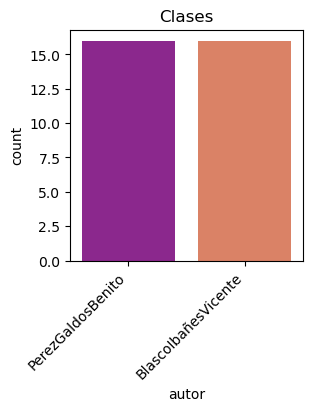

In [3]:
#ver instancias de clase
sns.countplot(x='autor',data=data, palette="plasma")
fig = plt.gcf()
fig.set_size_inches(3,3)
plt.xticks(rotation=45, ha='right')
plt.title('Clases')

['num_sentences', 'num_words', 'num_unique_words', 'num_stopwords', 'num_punctuation', 'punctuation_to_sentence_ratio', 'unique_to_total_words_ratio', 'stopwords_to_total_words_ratio', 'num_syllables', 'FRE', 'FKGL']


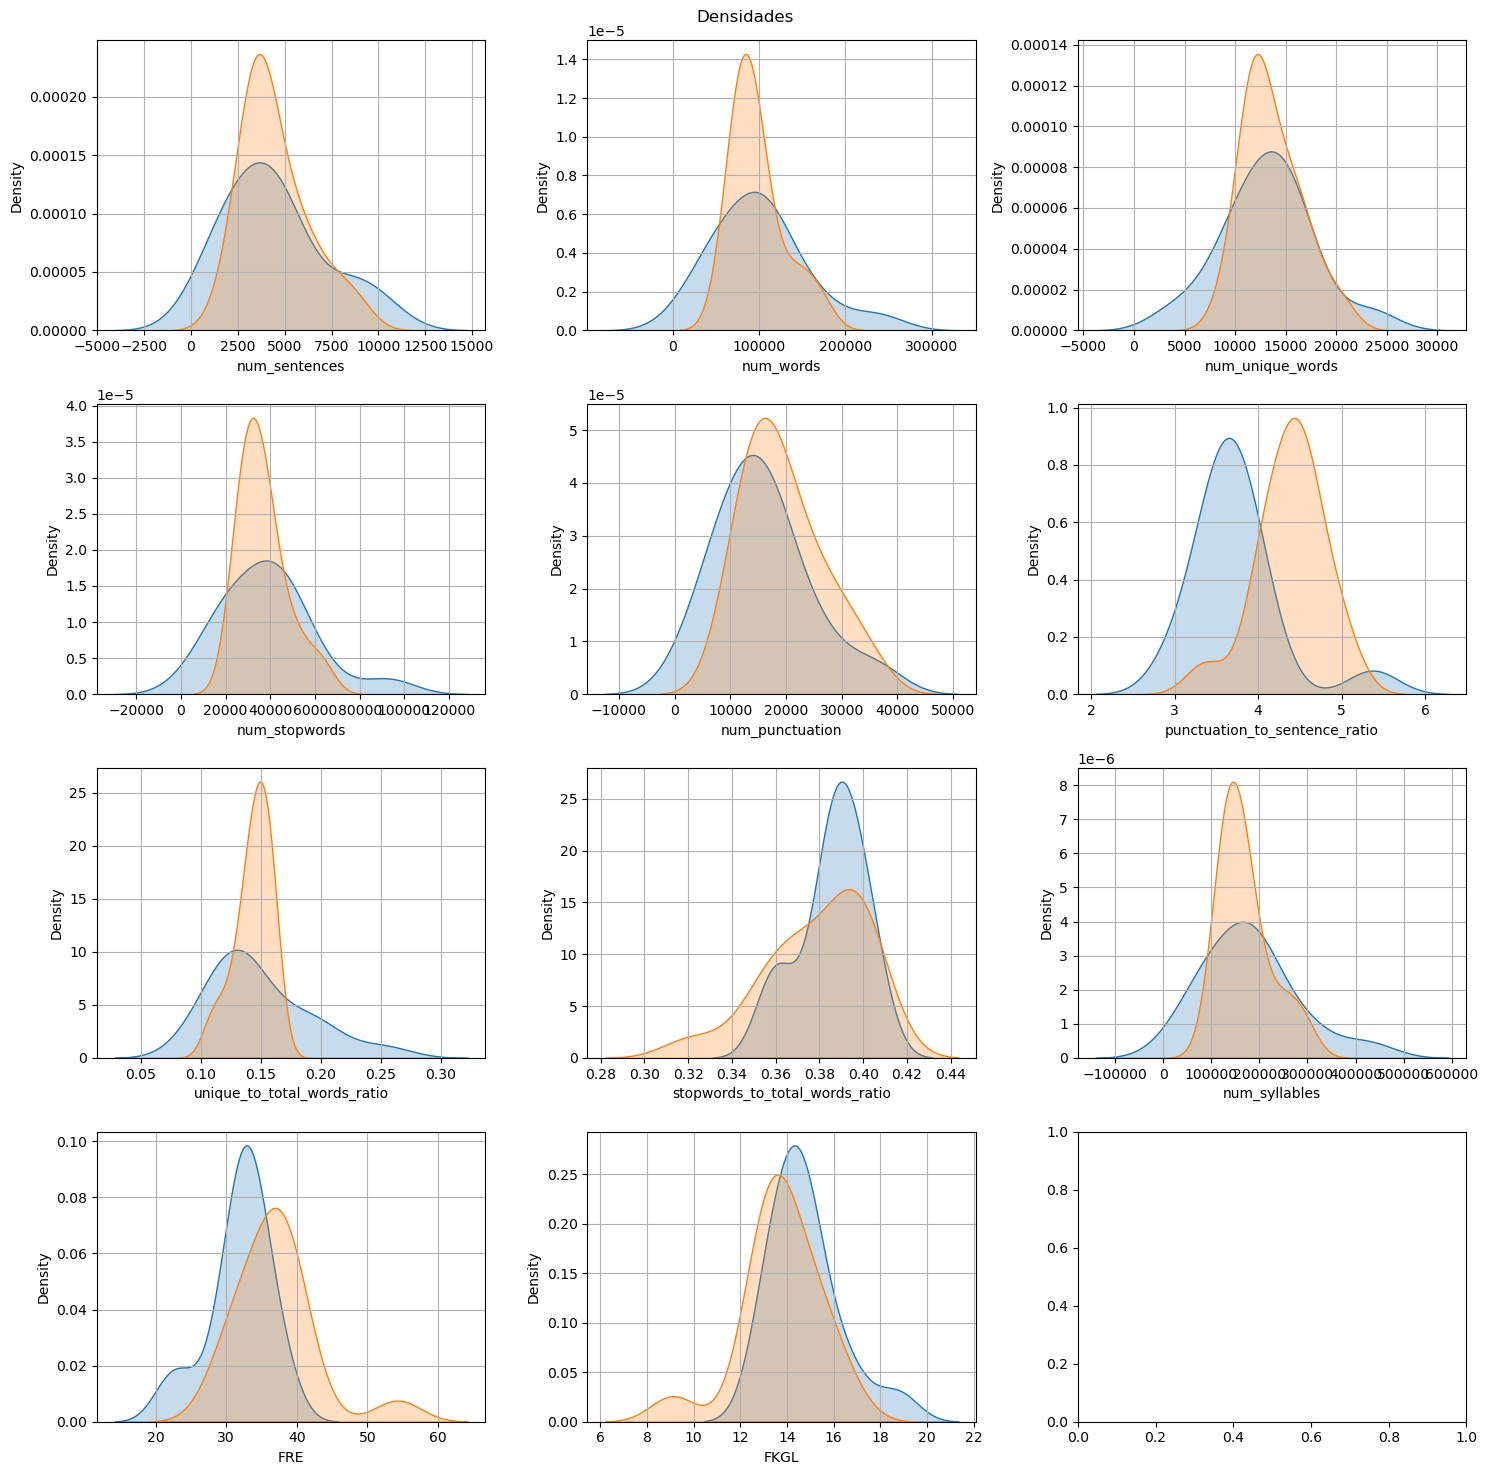

In [22]:
#distribuciones de cada clase
import warnings
warnings.filterwarnings('ignore')
y  = "autor"
fig, ax = plt.subplots(nrows=4,ncols=3,figsize=(15, 15))
fig.suptitle("Densidades",fontsize=12)
labels = list(data.columns.values)
labels = labels[3:]

print(labels)
j=0
k=0
for x in labels:
    for i in data[y].unique():
        sns.distplot(data[data[y]==i][x],hist=False,kde=True,kde_kws={"shade":True},ax=ax[k][j%3])
        ax[k][j%3].grid(True)
    j=j+1
    if j%3 == 0 : 
        k=k+1 

plt.tight_layout()
plt.show()

# Modelos

In [79]:
def cross_validation(classifier, features, labels, n_classifier, dataset, cv=5):

  # Crear un objeto de KFold con el número deseado de divisiones (k)
    kf = KFold(n_splits=cv)

  # Realizar la validación cruzada 
    scores = cross_val_score(classifier, features, labels, cv=kf)
  # Imprimir los resultados de la validación cruzada
    print(f"Para el clasificador: {n_classifier}\nConjunto de datos: {dataset}")
    print("Accuracy de cada fold:", scores)
    print("Accuracy promedio:", np.mean(scores))
    print("\n")

In [82]:
# Función para evaluar modelo de clasificación
def evaluate_classifier(classifier, test_vectors, test_labels):

  # Realizar predicciones
  predictions = classifier.predict(test_vectors)

  # Matriz de Confusión
  matriz = confusion_matrix(test_labels, predictions)
  cm_display = ConfusionMatrixDisplay(confusion_matrix = matriz, display_labels = [False, True])
  cm_display.plot()
  plt.show()

  # print('Matriz de Confusión:')
  # print(matriz)

  # Calcular la precisión del modelo
  precision = precision_score(test_labels, predictions, average='macro')
  print('Precisión del modelo:')
  print(precision)

  # Calcular la exactitud del modelo
  accuracy = accuracy_score(test_labels, predictions)
  print('Exactitud del modelo:')
  print(accuracy)

  # Calcular la recall del modelo
  recall = recall_score(test_labels, predictions, average='macro')
  print('Recall del modelo:')
  print(recall)

  # Calcular la F1-Score del modelo
  f1 = f1_score(test_labels, predictions, average='macro')
  print('Puntuación f1 del modelo:')
  print(f1)
  print("\n")

MODELO 1


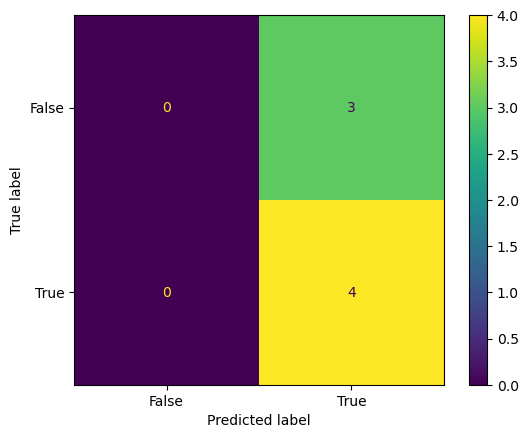

Precisión del modelo:
0.2857142857142857
Exactitud del modelo:
0.5714285714285714
Recall del modelo:
0.5
Puntuación f1 del modelo:
0.36363636363636365


Para el clasificador: GaussianNaiveBayes
Conjunto de datos: modelo 1
Accuracy de cada fold: [0.28571429 0.71428571 0.33333333 0.83333333 0.83333333]
Accuracy promedio: 0.6


MODELO 2


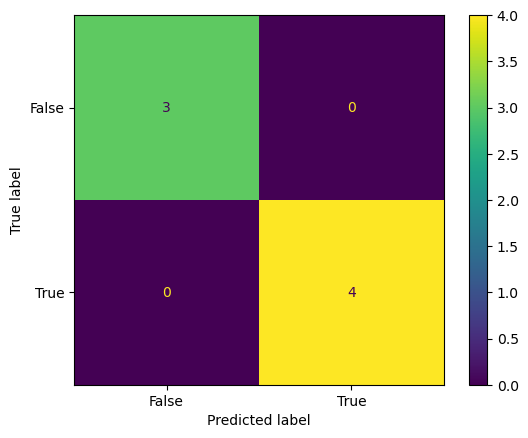

Precisión del modelo:
1.0
Exactitud del modelo:
1.0
Recall del modelo:
1.0
Puntuación f1 del modelo:
1.0


Para el clasificador: GaussianNaiveBayes
Conjunto de datos: modelo 2
Accuracy de cada fold: [0.85714286 0.85714286 0.83333333 0.83333333 0.83333333]
Accuracy promedio: 0.8428571428571429




In [90]:
# Supongamos que 'columna_etiqueta' es el nombre de tu columna de clasificación
y = data['autor']
encoder = LabelEncoder()
y = encoder.fit_transform(y)



#modelo de datos
m1_data = data.drop(['nombre','autor','indice'],axis=1)
m2_data = X.drop(['FKGL','stopwords_to_total_words_ratio','num_words','num_stopwords',
             'num_syllables','num_punctuation','stopwords_to_total_words_ratio','num_unique_words','unique_to_total_words_ratio'], axis=1)

m1_train, m1_test, y_train, y_test = train_test_split(m1_data, y, test_size = 0.2, random_state = 42)
m2_train, m2_test, y_train, y_test = train_test_split(m2_data, y, test_size = 0.2, random_state = 42)

# Crea un clasificador Gaussian Naive Bayes y entrena con los datos
model_1 = GaussianNB()
model_1.fit(m1_train, y_train)


model_2 = GaussianNB()
model_2 = model_2.fit(m2_train, y_train)

#vevaluacion y validacion cruzada
print("MODELO 1")
evaluate_classifier(model_1, m1_test, y_test)
cross_validation(model_1, m1_data, y, "GaussianNaiveBayes", "modelo 1", cv=5)
print("MODELO 2")
evaluate_classifier(model_2, m2_test, y_test)
cross_validation(model_2, m2_data, y, "GaussianNaiveBayes", "modelo 2", cv=5)